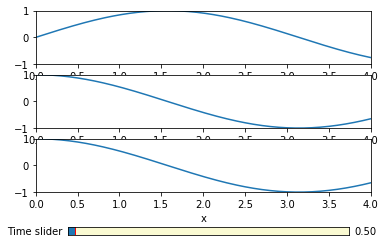

In [47]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np


#plt.subplots_adjust(bottom=0.25) 

x = np.linspace(0, 20, 1000)
p1 = np.sin(x)
p2 = np.cos(x)
p3 = np.cos(x)



ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)


plt.subplots_adjust(bottom=0.25)

ax1.plot(x, p1)
ax2.plot(x, p2)
ax3.plot(x, p3)
ax = [ax1, ax2, ax3]

for a in ax:
    a.axis([0, 4, -1, 1])
    plt.xlabel('x')

axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor) 
spos = Slider(axpos, 'Time slider', x[0], x[-1])
def update(val): 
    pos = spos.val 
    ax.axis([pos, pos+5, 0, 0.5]) 
    fig.canvas.draw_idle() 
spos.on_changed(update) 

plt.show()

In [59]:

import queue

g = queue.Queue(maxsize=0)
g.put(5)
g.put([1, 2, 3])
g.put(4)
print(g.queue[0])
g.put(4)
print(g.queue[0])
print(g.get())
print(g.get())
print(g.queue)


5
5
5
[1, 2, 3]
deque([4, 4])


In [27]:
data1 = (1, 2, 3, 4, 5, 6, 7)
# How do you unpack a list in something that returns a slice: g[list]

data2 = {'flex': [2, 3, 4], 'press': [1, 5, 6, 7]}


import time
xlist = []
time0 = time.time()
for i in range(1000000):
    x = data1[:3]
    y = data1[3:]
    xlist.append(data1)
print(time.time() - time0)

xdictlist = []
time0 = time.time()
for i in range(1000000):
    x = data2['flex']
    y = data2['press']
    xdictlist.append(data2) 
    
print(time.time() - time0)


0.1881389617919922
0.12923598289489746


In [31]:
import sys
import json
print(sys.getsizeof(xlist))
print(sys.getsizeof(json.dumps(xdictlist)))


8448728
44000049


In [35]:
from sys import getsizeof, stderr
from itertools import chain
from collections import deque

def total_size(o, handlers={}, verbose=False):
    """ Returns the approximate memory footprint an object and all of its contents.

    Automatically finds the contents of the following builtin containers and
    their subclasses:  tuple, list, deque, dict, set and frozenset.
    To search other containers, add handlers to iterate over their contents:

        handlers = {SomeContainerClass: iter,
                    OtherContainerClass: OtherContainerClass.get_elements}

    """
    dict_handler = lambda d: chain.from_iterable(d.items())
    all_handlers = {tuple: iter,
                    list: iter,
                    deque: iter,
                    dict: dict_handler,
                    set: iter,
                    frozenset: iter,
                   }
    all_handlers.update(handlers)     # user handlers take precedence
    seen = set()                      # track which object id's have already been seen
    default_size = getsizeof(0)       # estimate sizeof object without __sizeof__

    def sizeof(o):
        if id(o) in seen:       # do not double count the same object
            return 0
        seen.add(id(o))
        s = getsizeof(o, default_size)

        if verbose:
            print(s, type(o), repr(o), file=stderr)

        for typ, handler in all_handlers.items():
            if isinstance(o, typ):
                s += sum(map(sizeof, handler(o)))
                break
        return s

    return sizeof(o)


In [2]:
possible_keys = ['timestamp', 'imu', 'flex', 'press']
g = ['press', 'imu']

included_sensors = [key for key in possible_keys if key in g]
included_sensors

['imu', 'press']